# Neural Networks with Metalabeling


We create a neural network network with Metalabeling .  It's a classification problem, the goal is to predict if a company is healthy or bankrupt.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You have to include the full link to the csv file containing your dataset
company = pd.read_excel('Financial_ratios_dataset.xlsx', index_col=0) 

In [3]:
company.reset_index(drop=False, inplace=True)

In [4]:
company.head()

,Default,Status,Azienda,Strati,Strato_default,Numero CCIAA,Patrimonio_netto,x1,x2,x3,...,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,1,Fallita,MARCHE SEA - S.R.L.,Q1CE,Q1CE_1,AN0193642,57.613,0.034864,0.761340,0.130239,...,0.084326,0.079083,0.040722,0.043370,0.027238,1.234785,0.129363,0.035143,1.597119,0.226693
1,1,Fallita,MF IMMOBILI SRL,Q1CE,Q1CE_1,AR0164097,9.308,0.003969,0.937858,0.021155,...,0.011145,0.072988,0.019560,0.018236,0.007910,3.875600,0.004109,0.019146,0.958127,0.000000
2,1,Fallita,MASTER BUILDING & CO - S.R.L.,Q1CE,Q1CE_1,FI0498827,-164.918,-0.038232,0.107575,-0.575726,...,-0.028050,1.000000,-0.027552,-3.472857,-3.472857,-1.287947,-0.575726,-0.042433,0.071112,0.000000
3,1,Fallita,GROSSETO COSTRUZIONI S.R.L. IN LIQUIDAZIONE,Q1CE,Q1CE_1,GR0211798,-828.975,-0.726791,0.421716,-2.222256,...,-0.559649,-2.543249,-0.546949,-2.598244,-2.598244,-0.000273,-2.101688,-1.124265,0.199592,0.966950
4,1,Fallita,ALMA NOLEGGI S.R.L.,Q1CE,Q1CE_1,LI0098310,-507.778,-1.707348,0.881128,-6.036066,...,-0.975016,-227.509824,-0.544926,-312.650465,-312.650465,-0.001095,-4.255919,-3.593897,0.214686,0.000000


In [5]:
company.tail()

,Default,Status,Azienda,Strati,Strato_default,Numero CCIAA,Patrimonio_netto,x1,x2,x3,...,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
301,0,Sana,NEW TECH SRL PIU' BREVEMENTE DETTA N.T. SRL,Q4NO,Q4NO_0,VA0266018,287.787,0.007979,0.919568,0.136759,...,0.257227,0.443621,0.016520,0.338013,0.152726,-0.065913,0.015558,-0.019215,105.503165,0.0
302,0,Sana,OLIMPIA COSTRUZIONI - S.R.L.,Q3CE,Q3CE_0,RM1420536,338.561,0.108128,0.992810,0.445741,...,0.578785,0.110826,0.435539,0.107278,0.080727,0.011770,0.862780,0.143136,7.287547,0.0
303,0,Sana,SOFIA IMMOBILIARE SRLS SOCIETA' A RESPONSABILI...,Q1CE,Q1CE_0,RM1458306,2.076,-0.019120,0.999408,0.015558,...,-2.011867,-215.818182,-0.019519,-231.181818,-233.090909,0.047888,0.241169,0.132980,1.717497,0.0
304,0,Sana,MDF ROME GROUP SOCIETA' A RESPONSABILITA' LIMI...,Q1CE,Q1CE_0,RM1469349,68.113,0.099219,1.000000,0.862780,...,1.465707,0.248811,1.043109,0.246744,0.175602,0.011770,0.862780,0.099219,7.287547,0.0
305,0,Sana,SE.MA S.R.L. SEMPLIFICATA,Q1CE,Q1CE_0,RM1524210,26.121,0.142940,0.877919,0.241271,...,0.198264,0.066928,0.182356,0.049178,0.049178,0.047888,0.241169,0.187714,1.717497,0.0


In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Default           306 non-null    int64  
 1   Status            306 non-null    object 
 2   Azienda           306 non-null    object 
 3   Strati            306 non-null    object 
 4   Strato_default    306 non-null    object 
 5   Numero CCIAA      306 non-null    object 
 6   Patrimonio_netto  306 non-null    float64
 7   x1                306 non-null    float64
 8   x2                306 non-null    float64
 9   x3                306 non-null    float64
 10  x4                306 non-null    float64
 11  x5                306 non-null    float64
 12  x6                306 non-null    float64
 13  x7                306 non-null    float64
 14  x8                306 non-null    float64
 15  x9                306 non-null    float64
 16  x10               306 non-null    float64
 1

In [7]:
company.describe()

,Default,Patrimonio_netto,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,3.060000e+02,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.500000,-1734.866376,-0.091430,0.766454,-1.021737,0.011309,6.241549e-01,1.907838,3.089686,4.303707,-3.171389,-48.672680,1.834123,-55.746402,-58.152927,5.955191,-1.007482,-0.564749,17.394394,0.060402
std,0.500819,12881.534799,0.359866,0.281404,9.852572,0.014048,7.380221e-01,9.426420,28.244337,25.397503,70.340933,642.957356,31.273127,656.884001,669.572031,128.395148,9.860319,7.876277,189.186352,0.131913
min,0.000000,-187162.536000,-2.407513,0.011731,-122.266943,0.000000,7.493205e-07,0.000000,0.000000,0.000000,-1216.762634,-11180.500000,-1.141864,-11249.000000,-11356.500000,-534.411765,-122.167986,-137.530077,0.000000,0.000000
25%,0.000000,-107.709750,-0.082930,0.625161,-0.154474,0.000676,6.057038e-02,0.675065,0.527972,0.821453,-0.132580,-0.295261,-0.052494,-0.540696,-0.539776,-0.036531,-0.154420,-0.060255,0.735413,0.000000
50%,0.500000,51.322500,0.000663,0.909923,0.094294,0.006169,3.213459e-01,0.866077,0.969239,1.025489,0.006906,0.050201,0.006401,0.011910,0.001030,0.000000,0.088573,0.006860,1.198001,0.000000
75%,1.000000,217.093750,0.029904,0.981530,0.275041,0.016282,9.298993e-01,1.071181,1.209648,1.861488,0.112805,0.205272,0.086091,0.098451,0.074941,0.089849,0.275041,0.056387,2.117888,0.048588
max,1.000000,2559.273000,1.744649,1.000000,1.000000,0.095631,3.986843e+00,120.443433,489.870968,317.676128,158.603000,60.218000,547.032258,34.134000,25.372000,2173.481481,1.000000,2.621502,3262.724000,0.966950


In [8]:
company.columns

Index(['Default', 'Status', 'Azienda', 'Strati', 'Strato_default',
       'Numero CCIAA', 'Patrimonio_netto', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6',
       'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18'],
      dtype='object')

# PERFORM DATA VISUALIZATION

<AxesSubplot:xlabel='Status', ylabel='count'>

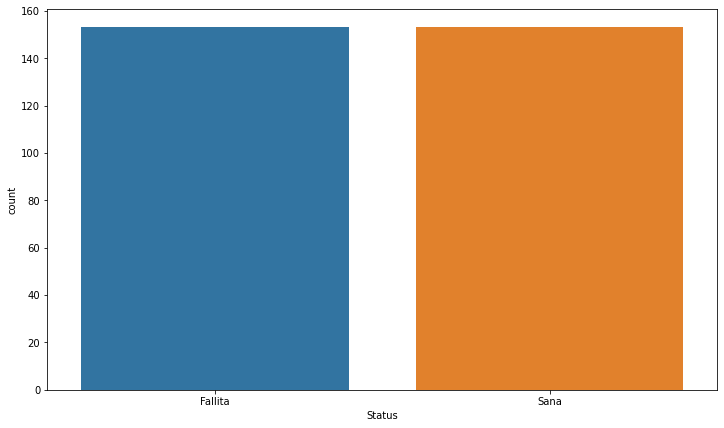

In [9]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Status', data = company)

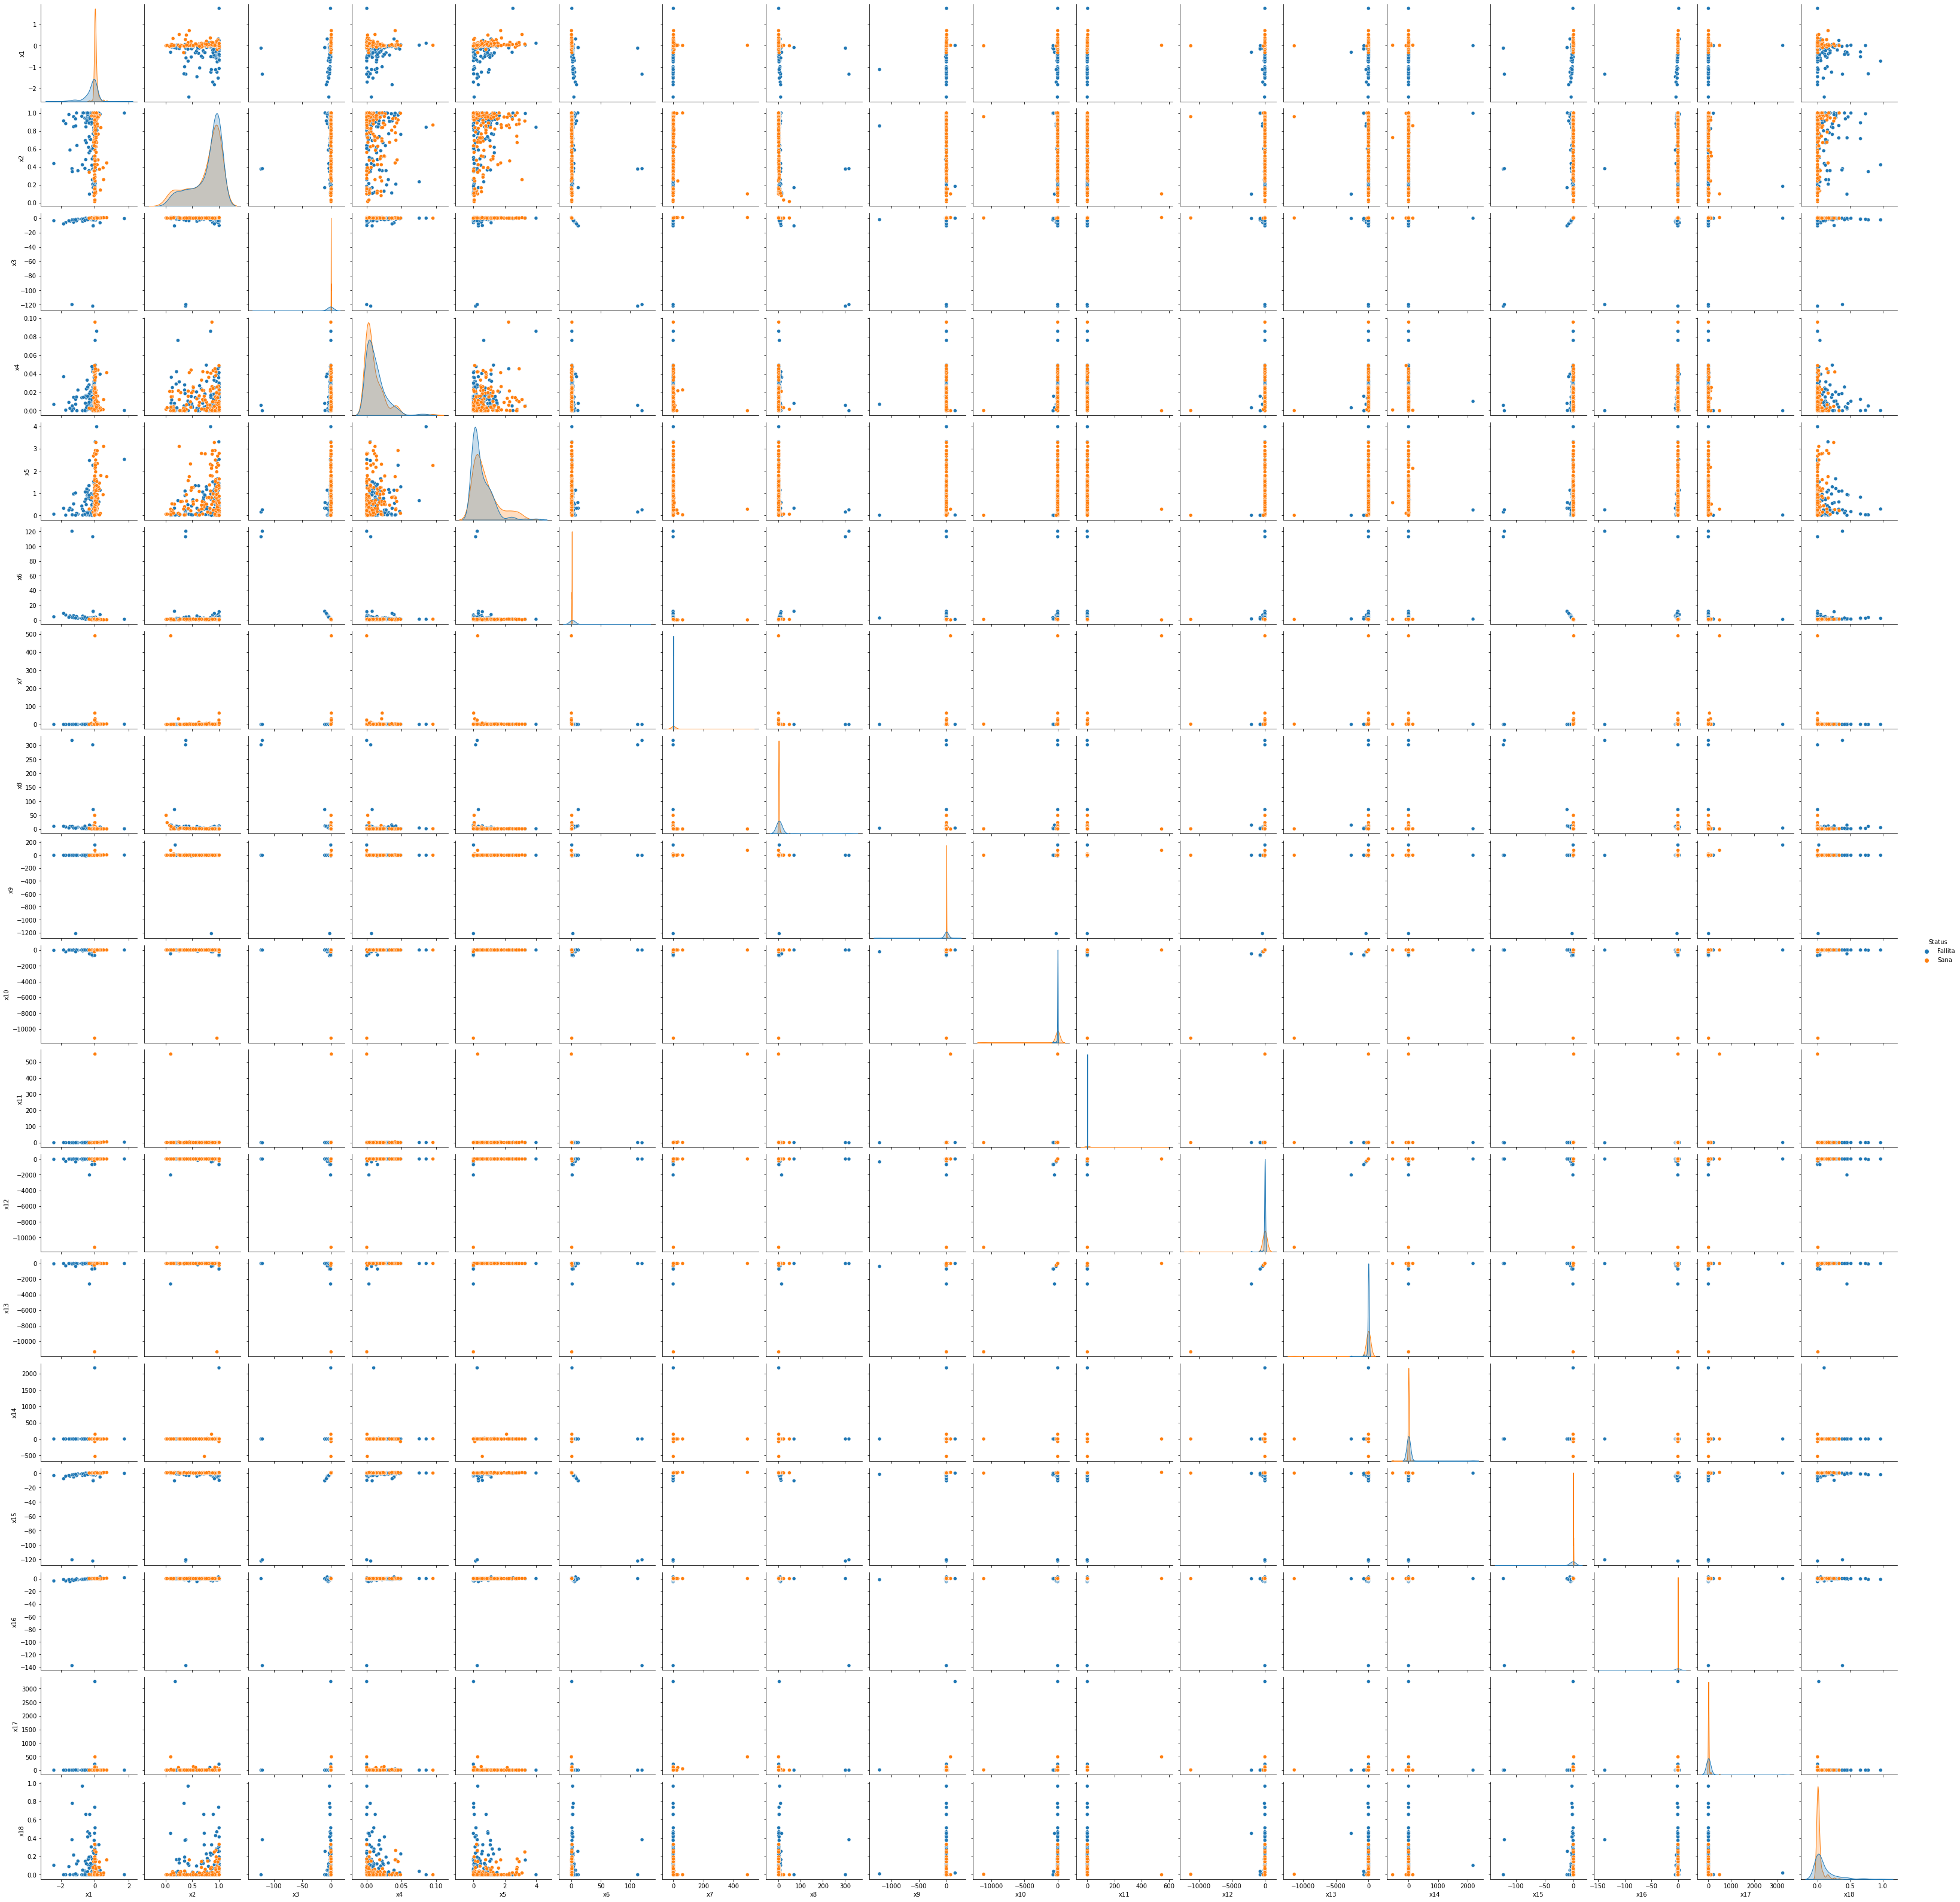

In [41]:
sns.pairplot(company, hue = 'Status', vars = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8','x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18'])

# SPLIT THE DATA AND PREPARE IT FOR TRAINING

In [11]:
company.iloc[:, 7:25]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,0.034864,0.761340,0.130239,0.049221,1.279996,0.862991,0.882210,1.133516,0.084326,0.079083,0.040722,0.043370,0.027238,1.234785,0.129363,0.035143,1.597119,0.226693
1,0.003969,0.937858,0.021155,0.015630,0.501796,0.978845,0.958127,1.043703,0.011145,0.072988,0.019560,0.018236,0.007910,3.875600,0.004109,0.019146,0.958127,0.000000
2,-0.038232,0.107575,-0.575726,0.036126,0.011009,1.540125,0.069848,14.316794,-0.028050,1.000000,-0.027552,-3.472857,-3.472857,-1.287947,-0.575726,-0.042433,0.071112,0.000000
3,-0.726791,0.421716,-2.222256,0.000149,0.279724,2.055521,0.205163,4.874182,-0.559649,-2.543249,-0.546949,-2.598244,-2.598244,-0.000273,-2.101688,-1.124265,0.199592,0.966950
4,-1.707348,0.881128,-6.036066,0.000668,0.005461,6.595205,0.133601,7.484958,-0.975016,-227.509824,-0.544926,-312.650465,-312.650465,-0.001095,-4.255919,-3.593897,0.214686,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.007979,0.919568,0.136759,0.000000,0.052241,0.818840,1.123012,0.890462,0.257227,0.443621,0.016520,0.338013,0.152726,-0.065913,0.015558,-0.019215,105.503165,0.000000
302,0.108128,0.992810,0.445741,0.005564,1.339428,0.554234,1.791320,0.558247,0.578785,0.110826,0.435539,0.107278,0.080727,0.011770,0.862780,0.143136,7.287547,0.000000
303,-0.019120,0.999408,0.015558,0.001285,0.000082,0.984442,1.015203,0.985025,-2.011867,-215.818182,-0.019519,-231.181818,-233.090909,0.047888,0.241169,0.132980,1.717497,0.000000
304,0.099219,1.000000,0.862780,0.003744,0.565019,0.137220,7.287547,0.137220,1.465707,0.248811,1.043109,0.246744,0.175602,0.011770,0.862780,0.099219,7.287547,0.000000


In [12]:
X = company.iloc[:, 7:25].values

In [13]:
X

array([[ 3.48644516e-02,  7.61339618e-01,  1.30238604e-01, ...,
         3.51429250e-02,  1.59711870e+00,  2.26692560e-01],
       [ 3.96924124e-03,  9.37857679e-01,  2.11550263e-02, ...,
         1.91458897e-02,  9.58126878e-01,  0.00000000e+00],
       [-3.82316862e-02,  1.07574742e-01, -5.75726474e-01, ...,
        -4.24329382e-02,  7.11115932e-02,  0.00000000e+00],
       ...,
       [-1.91204874e-02,  9.99407951e-01,  1.55581369e-02, ...,
         1.32980492e-01,  1.71749697e+00,  0.00000000e+00],
       [ 9.92185442e-02,  1.00000000e+00,  8.62779622e-01, ...,
         9.92185442e-02,  7.28754731e+00,  0.00000000e+00],
       [ 1.42940030e-01,  8.77918791e-01,  2.41271337e-01, ...,
         1.87713911e-01,  1.71749697e+00,  0.00000000e+00]])

In [14]:
company.iloc[:, 0]

0      1
1      1
2      1
3      1
4      1
      ..
301    0
302    0
303    0
304    0
305    0
Name: Default, Length: 306, dtype: int64

In [15]:
y = company.iloc[:, 0].values

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
X

array([[ 0.35152357, -0.01820496,  0.11711279, ...,  0.0762892 ,
        -0.08363791,  1.26266533],
       [ 0.26553086,  0.61009844,  0.10602307, ...,  0.07425483,
        -0.08702102, -0.45864374],
       [ 0.14807018, -2.34523421,  0.04534255, ...,  0.06642376,
        -0.09171728, -0.45864374],
       ...,
       [ 0.20126367,  0.82918222,  0.10545407, ...,  0.08873135,
        -0.08300057, -0.45864374],
       [ 0.53064464,  0.83128958,  0.1915848 , ...,  0.08443779,
        -0.05351021, -0.45864374],
       [ 0.65233759,  0.39675026,  0.12840066, ...,  0.09569188,
        -0.08300057, -0.45864374]])

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [20]:
X_train.shape

(244, 18)

In [21]:
X_test.shape

(62, 18)

# BUILD A NEURAL NETWORK MODEL USING KERAS

In [22]:
# !pip install tensorflow
import tensorflow as tf

ANN_model = tf.keras.models.Sequential()
ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(18, )))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [23]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               7600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 168,401
Trainable params: 168,401
Non-trainable params: 0
_________________________________________________________________


# COMPILE AND TRAIN THE ANN MODEL

In [24]:
ANN_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [25]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
8/8 [==============================] - 5s 17ms/step - loss: 0.6431 - accuracy: 0.6803
Epoch 2/200
8/8 [==============================] - 0s 21ms/step - loss: 0.5439 - accuracy: 0.7828
Epoch 3/200
8/8 [==============================] - 0s 17ms/step - loss: 0.5037 - accuracy: 0.7787
Epoch 4/200
8/8 [==============================] - 0s 12ms/step - loss: 0.4788 - accuracy: 0.7746
Epoch 5/200
8/8 [==============================] - 0s 22ms/step - loss: 0.4681 - accuracy: 0.7869
Epoch 6/200
8/8 [==============================] - 0s 22ms/step - loss: 0.4438 - accuracy: 0.7951
Epoch 7/200
8/8 [==============================] - 0s 22ms/step - loss: 0.4330 - accuracy: 0.7910
Epoch 8/200
8/8 [==============================] - 0s 21ms/step - loss: 0.4082 - accuracy: 0.8115
Epoch 9/200
8/8 [==============================] - 0s 17ms/step - loss: 0.3972 - accuracy: 0.8238
Epoch 10/200
8/8 [==============================] - 0s 16ms/step - loss: 0.3997 - accuracy: 0.8402
Epoch 11/200
8/8 [=

8/8 [==============================] - 0s 7ms/step - loss: 0.1622 - accuracy: 0.9385
Epoch 85/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1699 - accuracy: 0.9221
Epoch 86/200
8/8 [==============================] - 0s 10ms/step - loss: 0.1662 - accuracy: 0.9303
Epoch 87/200
8/8 [==============================] - 0s 10ms/step - loss: 0.1352 - accuracy: 0.9426
Epoch 88/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1707 - accuracy: 0.9303
Epoch 89/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1589 - accuracy: 0.9303
Epoch 90/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1507 - accuracy: 0.9344
Epoch 91/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1532 - accuracy: 0.9262
Epoch 92/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1561 - accuracy: 0.9385
Epoch 93/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1600 - accuracy: 0.9180
Epoch 94/200
8/8 [=============

8/8 [==============================] - 0s 8ms/step - loss: 0.1052 - accuracy: 0.9508
Epoch 167/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0790 - accuracy: 0.9631
Epoch 168/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 0.9672
Epoch 169/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0754 - accuracy: 0.9672
Epoch 170/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0774 - accuracy: 0.9795
Epoch 171/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 172/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0670 - accuracy: 0.9795
Epoch 173/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0933 - accuracy: 0.9631
Epoch 174/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0957 - accuracy: 0.9508
Epoch 175/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0721 - accuracy: 0.9795
Epoch 176/200
8/8 [==

In [26]:
y_pred = ANN_model.predict(X_test)

In [27]:
#y_pred

In [28]:
y_pred = (y_pred > 0.5)

In [29]:
#y_pred

# EVALUATE TRAINED MODEL PERFORMANCE 

In [30]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

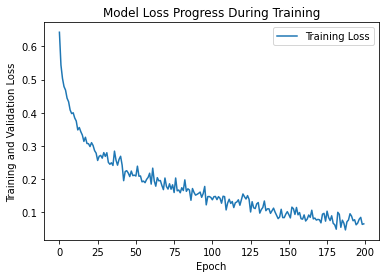

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

<AxesSubplot:>

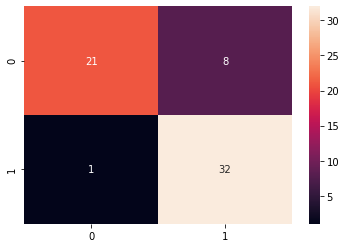

In [32]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        29
           1       0.80      0.97      0.88        33

    accuracy                           0.85        62
   macro avg       0.88      0.85      0.85        62
weighted avg       0.87      0.85      0.85        62



# TRAIN AND EVALUATE AN XG-BOOST ALGORITHM

In [34]:
#!pip install xgboost

In [35]:
# Train an XGBoost classifier model 
import xgboost as xgb
XGB_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
XGB_model.fit(X_train, y_train)

[18:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
result_train = XGB_model.score(X_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.9590163934426229


In [37]:
# predict the score of the trained model using the testing dataset

result_test = XGB_model.score(X_test, y_test)
print("Accuracy : {}".format(result_test))

Accuracy : 0.7903225806451613


In [38]:
# make predictions on the test data
y_predict = XGB_model.predict(X_test)


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.78      0.85      0.81        33

    accuracy                           0.79        62
   macro avg       0.79      0.79      0.79        62
weighted avg       0.79      0.79      0.79        62



Text(0.5, 15.0, 'Actual class')

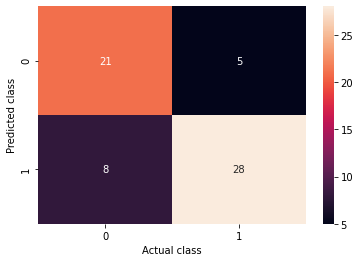

In [40]:
cm = confusion_matrix(y_predict, y_test) 
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')